         Date  Views
0  01/06/2021   7831
1  02/06/2021   7798
2  03/06/2021   7401
3  04/06/2021   7054
4  05/06/2021   7973
<bound method DataFrame.info of           Date  Views
0   2021-06-01   7831
1   2021-06-02   7798
2   2021-06-03   7401
3   2021-06-04   7054
4   2021-06-05   7973
..         ...    ...
386 2022-06-22  11154
387 2022-06-23  10382
388 2022-06-24   9555
389 2022-06-25   8502
390 2022-06-26   8368

[391 rows x 2 columns]>


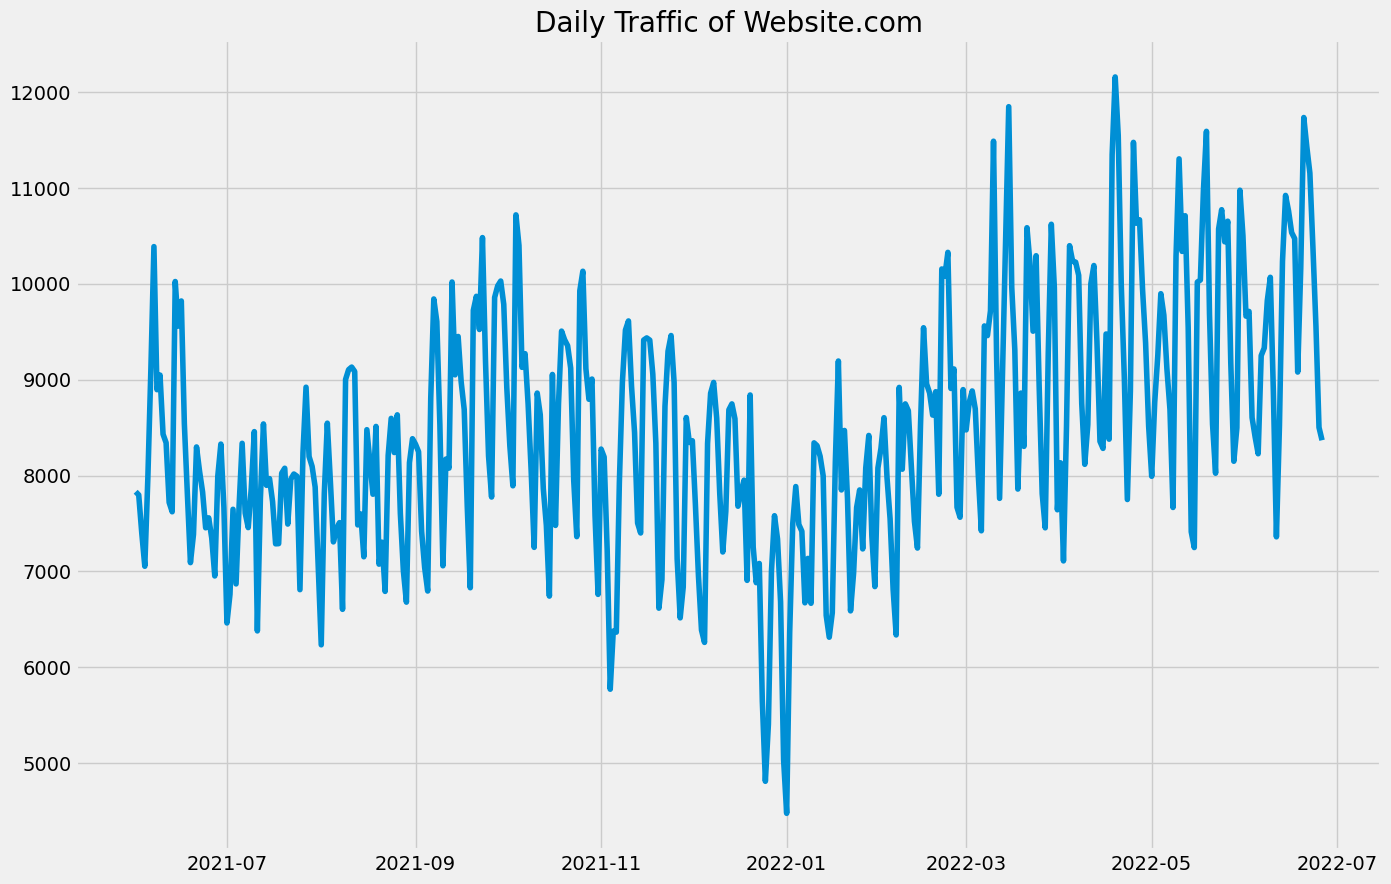

TypeError: seasonal_decompose() got an unexpected keyword argument 'freq'

In [2]:
# import the necessary dataset
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
from pivottablejs import pivot_ui

data = pd.read_csv("Thecleverprogrammer.csv")
print(data.head())

# Convert the date column into Datetime data type
data["Date"] = pd.to_datetime(data["Date"],
                              format="%d/%m/%Y")
print(data.info)

# Daily Website traffic
plt.style.use('fivethirtyeight')
plt.figure(figsize=(15, 10))
plt.plot(data["Date"], data["Views"])
# daily traffic of website
plt.title("Daily Traffic of Website.com")
plt.show()

# Check if our dataset is stationary or seasonal
result = seasonal_decompose(data["Views"],
                            model='multiplicative',
                            freq=30)
fig = plt.figure()
fig = result.plot()
fig.set_size_inches(15, 10)

# To find the value of p and q, use the auto_correlation and partial auto_correlation plots:
pd.plotting.autocorrelation_plot(data["Views"])
plot_pacf(data["Views"], lags=100)
# a SARIMA model for the task of website traffic forecasting:
p, d, q = 5, 1, 2
model = sm.tsa.statespace.SARIMAX(data['Views'],
                                  order=(p, d, q),
                                  seasonal_order=(p, d, q, 12))
model = model.fit()
print(model.summary())

# Forecast traffic on the website for the next 50days
predictions = model.predit(len(data), len(data) + 50)
print(predictions)
data["Views"].plot(legend=True, label="Training Data",
                   figsize=(15, 10))
predictions.plot(legend=True, label="Predictions")
